In [1]:
import h5py
import matplotlib.pyplot as plt

from tinynn import *

In [15]:

np.random.seed(1)

def load_dataset():
    train_dataset = h5py.File('./datasets/train_catvnoncat.h5', 'r')
    test_dataset = h5py.File('./datasets/test_catvnoncat.h5', 'r')

    X_train = np.array(train_dataset['train_set_x'])
    Y_train = np.array(train_dataset['train_set_y']).reshape(1,-1)


    X_test = np.array(test_dataset['test_set_x'])
    Y_test = np.array(test_dataset['test_set_y']).reshape(1,-1)

    return X_train, Y_train, X_test, Y_test


X, Y, X_test, Y_test = load_dataset()

print("Train X ", X.shape)
print("Train Y ", Y.shape)
print("Test X ", X_test.shape)
print("Test Y ", Y_test.shape)
# Preprocess data
# make feature vector from the image dimention 64,64,3 to 

X_test_origin = X_test

# m - no of training example
# w, h, rgb - width height and rgb image channel
# reshaping to features by training examples (nx, m)
X_train = X.reshape(-1, X.shape[1]*X.shape[2]*X.shape[3]).T  # (m, w, h, rgb) -> (nx, m) 
X_train = X_train/255.
X_test = X_test.reshape(-1, X_test.shape[1]*X_test.shape[2]*X_test.shape[3]).T  # (m, w, h, rgb) -> (nx, m) 
X_test = X_test/255.
# print(X_train.shape)
nx = X_train.shape[0]
layer_dims = np.array([nx, 20, 7, 5, 1])


Train X  (209, 64, 64, 3)
Train Y  (1, 209)
Test X  (50, 64, 64, 3)
Test Y  (1, 50)


In [3]:
parameters, cost, w1_l, cost_l =  train(X_train, Y, layer_dims, learning_rate=0.0075, iteration=3000)

print("Train Accuracy")
get_accuracy(parameters, X_train, Y)

print("Test Accuracy")
get_accuracy(parameters, X_test, Y_test)
# plt.plot(w1_l, cost_l)
# plt.show()
# parameters = initialize_network(layer_dims=layer_dims)
# print(parameters['W1'][0])


Cost after iteration 0: 0.7717493284237686
Cost after iteration 100: 0.6720534400822913
Cost after iteration 200: 0.6482632048575212
Cost after iteration 300: 0.6115068816101354
Cost after iteration 400: 0.5670473268366111
Cost after iteration 500: 0.54013766345478
Cost after iteration 600: 0.5279299569455267
Cost after iteration 700: 0.46547737717668514
Cost after iteration 800: 0.369125852495928
Cost after iteration 900: 0.3917469743480534
Cost after iteration 1000: 0.3151869888600617
Cost after iteration 1100: 0.27269984417893844
Cost after iteration 1200: 0.23741853400268134
Cost after iteration 1300: 0.19960120532208644
Cost after iteration 1400: 0.18926300388463305
Cost after iteration 1500: 0.1611885466582775
Cost after iteration 1600: 0.14821389662363316
Cost after iteration 1700: 0.1377748781297294
Cost after iteration 1800: 0.1297401754919012
Cost after iteration 1900: 0.12122535068005211
Cost after iteration 2000: 0.1138206066863371
Cost after iteration 2100: 0.1078392852625

np.float64(0.8200000000000001)

In [4]:
save_model(parameters, "cat_not_cat")

In [2]:
parameters = load_model('./cat_not_cat.h5')

In [29]:
preds = predict(parameters, X_test)

In [6]:
Y_test

array([[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 0]])

In [9]:
import matplotlib.pyplot as plt
import numpy as np


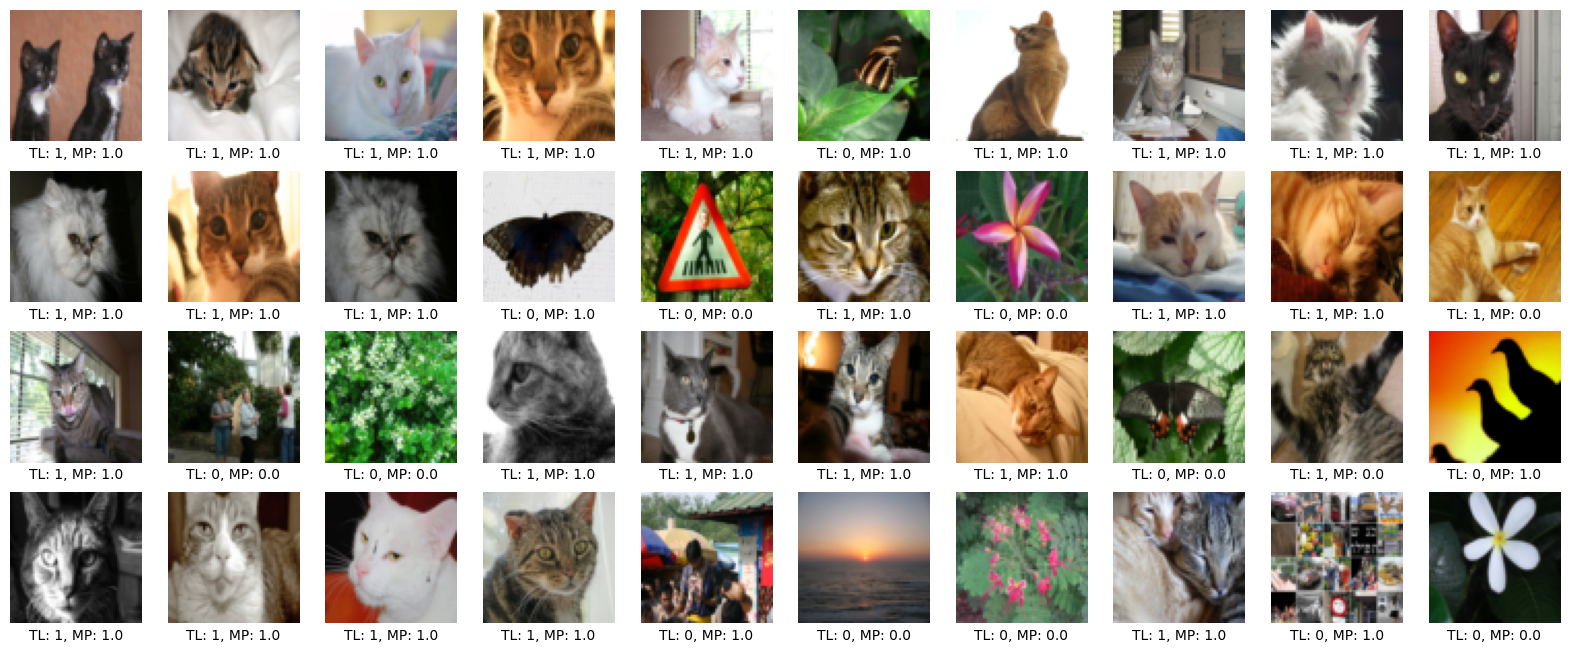

In [30]:
nc = 10

fig, axes = plt.subplots(nrows=4, ncols=nc, figsize=(20,8))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test_origin[i])
    ax.text(0.5, -0.15, f'TL: {str(Y_test[0][i])}, MP: {preds[0][i]}', transform=ax.transAxes, ha='center', va='bottom')
    ax.axis('off')
